In [20]:
# Library for plotting the images and the loss function
import matplotlib.pyplot as plt
import numpy as np
# We import the data set from tensorflow and build the model there
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [ ]:
# Download the data set
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

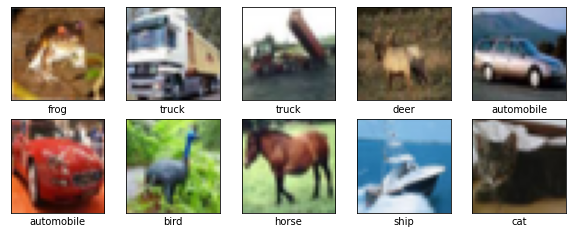

In [2]:
# Define the 10 image classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Show the first 10 images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

flatten a nested array of an unknown number of elements to a 1D array

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

In [10]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [12]:
history=ann.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 9s 4ms/step - loss: 1.8121 - accuracy: 0.3549 - val_loss: 1.6950 - val_accuracy: 0.3924
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6225 - accuracy: 0.4261 - val_loss: 1.6006 - val_accuracy: 0.4310
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5416 - accuracy: 0.4542 - val_loss: 1.5522 - val_accuracy: 0.4512
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4825 - accuracy: 0.4771 - val_loss: 1.5133 - val_accuracy: 0.4536
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4312 - accuracy: 0.4968 - val_loss: 1.4625 - val_accuracy: 0.4730
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3884 - accuracy: 0.5113 - val_loss: 1.5187 - val_accuracy: 0.4567
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3490 - accuracy: 0.5258 - val_loss: 1.4001 - val_accuracy:

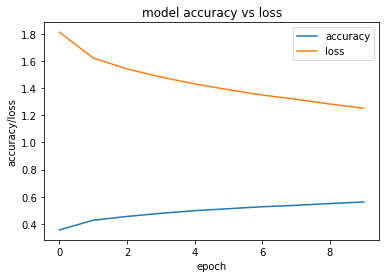

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='best')
plt.show()

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) #Filters=32, kernel size=(3,3)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [15]:
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 14s 5ms/step - loss: 1.5013 - accuracy: 0.4524 - val_loss: 1.1919 - val_accuracy: 0.5715
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1323 - accuracy: 0.6014 - val_loss: 1.0529 - val_accuracy: 0.6244
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9851 - accuracy: 0.6528 - val_loss: 0.9638 - val_accuracy: 0.6593
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8948 - accuracy: 0.6873 - val_loss: 0.9524 - val_accuracy: 0.6690
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8212 - accuracy: 0.7122 - val_loss: 0.9403 - val_accuracy: 0.6731
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7619 - accuracy: 0.7338 - val_loss: 0.9808 - val_accuracy: 0.6653
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7163 - accuracy: 0.7481 - val_loss: 0.8842 - val_accuracy

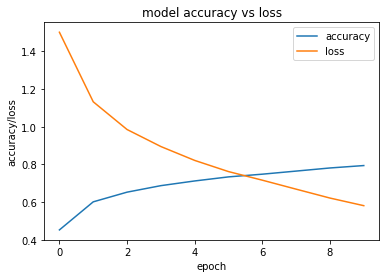

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='best')
plt.show()

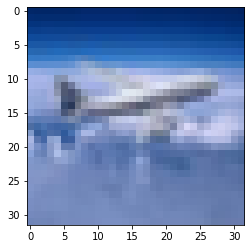

In [45]:
import random
n=random.randint(0,9999)
plt.imshow(x_test[n])

In [46]:
prediction=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [48]:
Pred_obj=class_names[np.argmax(prediction[n])]
print("It's a",Pred_obj)

It's a airplane
